#  Import Libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [24]:
data=pd.read_excel('Housing data Linear Reg.xlsx')
print(data.head())
print(data.info())
print(data.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
--

# Explore the Correlation Between Variables

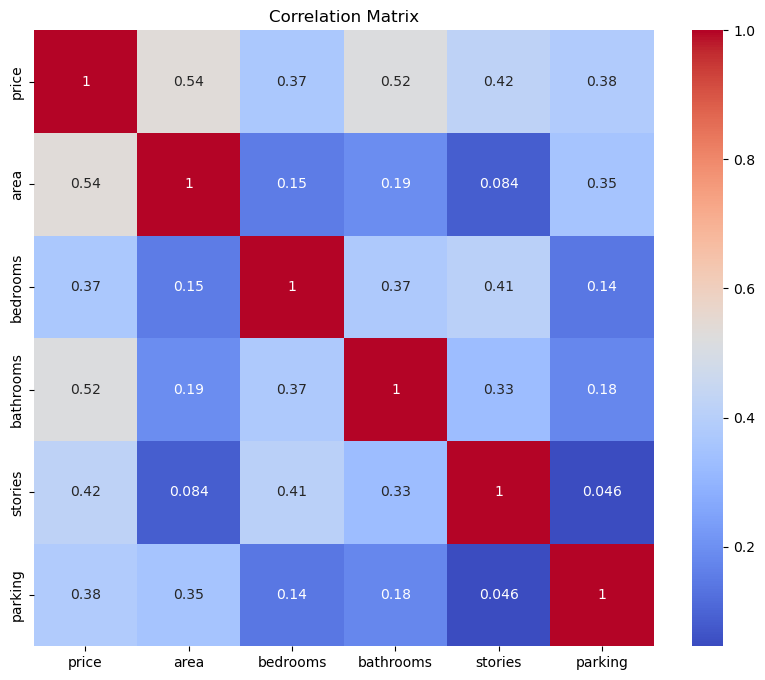

In [25]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Generate and plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing and Splitting the Data

In [26]:
# Apply one-hot encoding to convert categorical columns to numeric format
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [28]:
y_pred = model.predict(X_test)

# Evaluate the Model using MSE and R-Square

In [29]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared:{r2}")

Mean Squared Error: 1837637189871.7024
R-Squared:0.6364404686639471


# Visualize the results

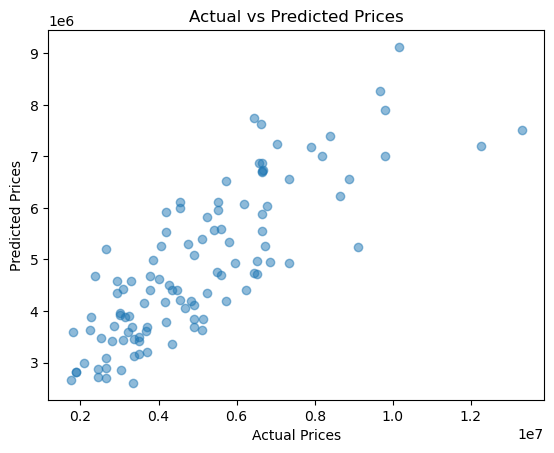

In [30]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Using df.corr() to find Contributing Attributes

In [21]:
# Apply one-hot encoding to convert categorical columns to numeric format
data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix on the encoded data
correlation_matrix = data_encoded.corr()

# Display the correlation of all features with 'price', sorted by importance
print(correlation_matrix['price'].sort_values(ascending=False))

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


# Use the Top Contributing Attributes for Prediction

In [23]:
# Selecting the most correlated attribute
top_feature = correlation_matrix['rice'].sort_values(ascending=False).index[1]
X_top = data[[top_feature]]

# Split the data and train model again
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)
model_top = LinearRegression()
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

# Evaluation
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)
print(f"Mean Squared Error (Top Feature): {mse_top}")
print(f"R-Squared (Top Feature): {r2_top}")

Mean Squared Error (Top Feature): 3675286604768.185
R-Squared (Top Feature): 0.27287851871974644
